# First look at Data

We will look at the location data-set from the [vast challenge 2015](http://vacommunity.org/2015+VAST+Challenge%3A+MC1).

This initial exploration will be accomplished using the following tools:

- [ipython notebook](http://ipython.org/)
- [Pandas](http://pandas.pydata.org/)
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) 
- [numpy](http://www.numpy.org/)

## 0. Setup environment

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style("darkgrid")

## 1. Read the data

In [3]:
df = pd.read_csv("../MC1 2015 Data/park-movement-Fri.csv")

Let's look at the first five rows

In [4]:
df.head()

,Timestamp,id,type,X,Y
0,2014-6-06 08:00:16,1591741,check-in,63,99
1,2014-6-06 08:00:16,825652,check-in,63,99
2,2014-6-06 08:00:19,179386,check-in,63,99
3,2014-6-06 08:00:19,531348,check-in,63,99
4,2014-6-06 08:00:31,1483004,check-in,0,67


What is the size of the table?

In [5]:
df.shape

(5350348, 5)

What are the types of the data?

In [6]:
df.dtypes

Timestamp    object
id            int64
type         object
X             int64
Y             int64
dtype: object

What are the values of *type* ?

In [7]:
df["type"].unique()

array(['check-in', 'movement'], dtype=object)

In [61]:
df.groupby("type")["type"].count()

type
check-in      77771
movement    5272577
Name: type, dtype: int64

How many different ids are there?

In [8]:
df["id"].unique().shape

(3557,)

In [70]:
pd.pivot_table(df,columns="type", values="X", index="id", aggfunc=len).head()

type,check-in,movement
id,,
941,38,1999
2672,35,1934
4343,12,696
4828,27,1564
4908,24,2167


In [72]:
pd.pivot_table(df,columns="type", values="X", index="id", aggfunc=len).mean()

type
check-in      21.864211
movement    1482.310093
dtype: float64

What is the type of the timestamps?

In [9]:
type(df.Timestamp[0])

str

They are strings, it would be better if they were dats, lets fix that
with the [to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime) function

In [10]:
df["time"] = pd.to_datetime(df.Timestamp, format="%Y-%m-%d %H:%M:%S")

In [11]:
df.tail()

,Timestamp,id,type,X,Y,time
5350343,2014-6-06 20:12:07,1168815,movement,41,76,2014-06-06 20:12:07
5350344,2014-6-06 20:12:07,321318,movement,68,64,2014-06-06 20:12:07
5350345,2014-6-06 20:12:07,1687201,movement,15,42,2014-06-06 20:12:07
5350346,2014-6-06 20:12:07,580635,movement,16,40,2014-06-06 20:12:07
5350347,2014-6-06 20:12:07,973520,movement,25,67,2014-06-06 20:12:07


In [12]:
df.dtypes

Timestamp            object
id                    int64
type                 object
X                     int64
Y                     int64
time         datetime64[ns]
dtype: object

Now the *time* column contains datetime objects

## 2. Looking at location data

First, take a random subsample to speed up exploration

In [63]:
df_small = df.sample(10000)

In [15]:
df_small.shape

(10000, 6)

We will now create a simple scatter plot with all the X and Y values in our subsample

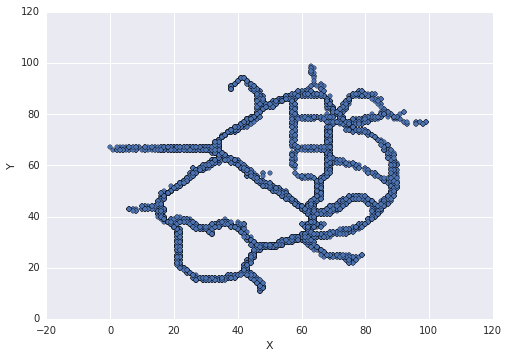

In [16]:
df_small.plot("X","Y","scatter")

It looks very similar to the pats in the map

Now lets look at just the *check-in* samples

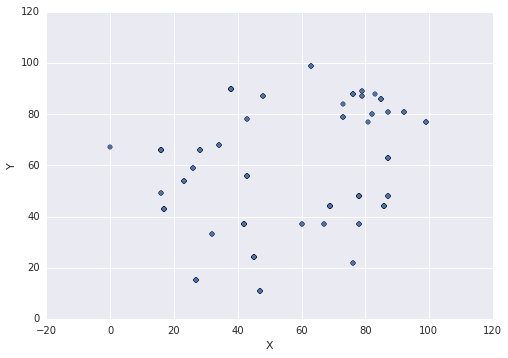

In [71]:
df_small.loc[df_small["type"]=="check-in"].plot("X","Y","scatter")

Lets look at the range of the location data

In [17]:
df["X"].min()

0

In [18]:
df["X"].max()

99

In [19]:
df["Y"].min()

11

In [20]:
df["Y"].max()

99

Now lets create a 2d histogram to see which locations are more popular. We will use the [hist2d](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist2d) function

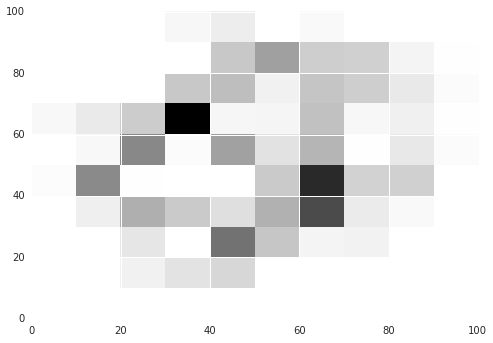

In [21]:
cnts, xe, ye, img = plt.hist2d(df_small["X"], df_small["Y"],range=((0,100),(0,100)),normed=True)

We can increase the number of bins

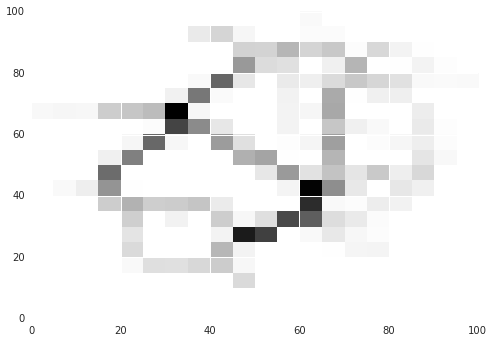

In [22]:
cnts, xe, ye, img = plt.hist2d(df_small["X"], df_small["Y"],range=((0,100),(0,100)),normed=True, bins=20)

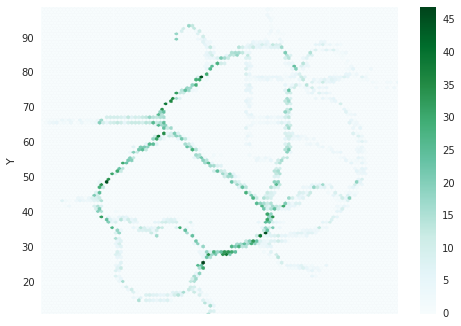

In [23]:
df_small.plot("X","Y","hexbin")

## 3. Single guest

Now lets plot the locations for a single random person

In [24]:
guest_id = np.random.choice(df["id"])

In [25]:
guest_df = df.loc[df["id"]==guest_id]

In [26]:
guest_df.shape

(1384, 6)

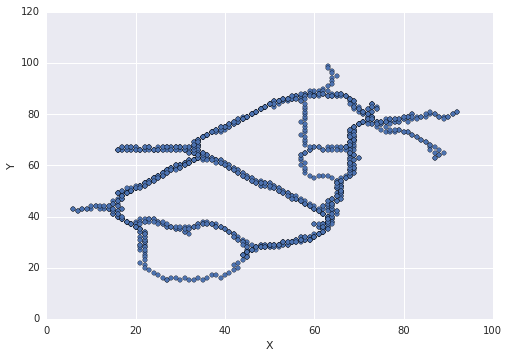

In [27]:
guest_df.plot("X","Y","scatter")

Now lets try to use the time information

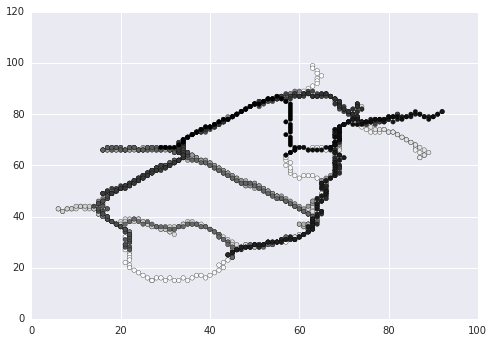

In [28]:
plt.scatter(guest_df["X"],guest_df["Y"],c=guest_df["time"])

At what time did he arrive?

In [29]:
guest_df["time"].min()

Timestamp('2014-06-06 08:53:29')

At what time did he leave?

In [30]:
guest_df["time"].max()

Timestamp('2014-06-06 19:34:08')

So how long did he stay?

In [31]:
guest_df["time"].max() - guest_df["time"].min()

Timedelta('0 days 10:40:39')

## 4. Single time frame

Where were the guests between 12:00 and 12:05 ?

In [32]:
noon_dates = (df["time"] < '2014-06-06 12:05:00') & (df["time"] >= '2014-06-06 12:00:00')

In [33]:
noon_df = df.loc[noon_dates]

In [34]:
noon_df.shape

(43356, 6)

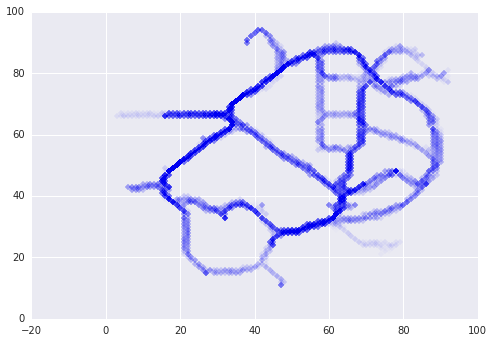

In [35]:
plt.scatter(noon_df["X"], noon_df["Y"], alpha=0.01, marker="o", s=30)

lets add some jitter

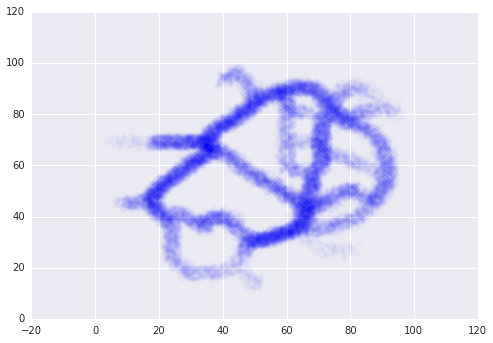

In [36]:
plt.scatter(noon_df["X"] +5*np.random.random(len(noon_df))
           ,noon_df["Y"]+5*np.random.random(len(noon_df)),
            alpha=0.01, marker="o", s=30)

## 5. Time analysis

Now lets try to ask some simple questions about time data

- At what time do guests arrive?
- At what time do they leave?
- How long they stay?
- How does park ocupacy vary during the day?

To answer the first questions we needd to transform the data

In [52]:
grouped_times = df.groupby("id")["time"]

In [53]:
arrivals = grouped_times.min()

In [54]:
departures = grouped_times.max()

In [55]:
duration = departures - arrivals

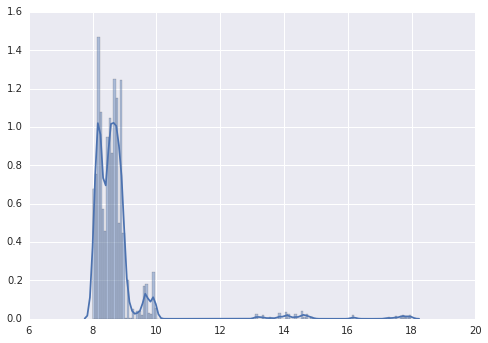

In [56]:
sns.distplot(arrivals.dt.hour+arrivals.dt.minute/60)

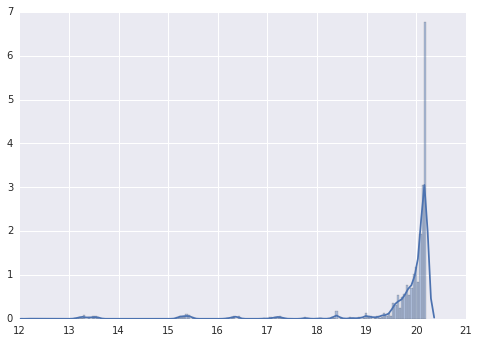

In [57]:
sns.distplot(departures.dt.hour+departures.dt.minute/60)

In [43]:
h_duration = duration.dt.seconds/60/60

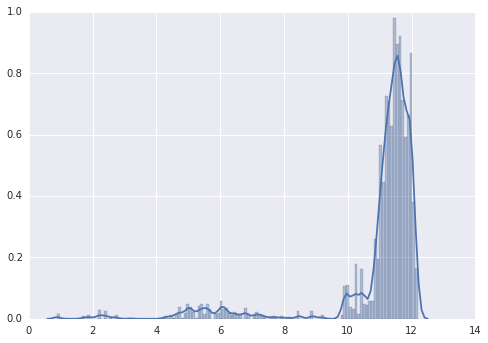

In [51]:
sns.distplot(h_duration)

Now for the question of park occupacy, we need to group the dataframe by time

In [45]:
time_groups = df.groupby(df.time.dt.hour)

In [46]:
occupancy = time_groups["id"].aggregate(lambda x:len(np.unique(x)))

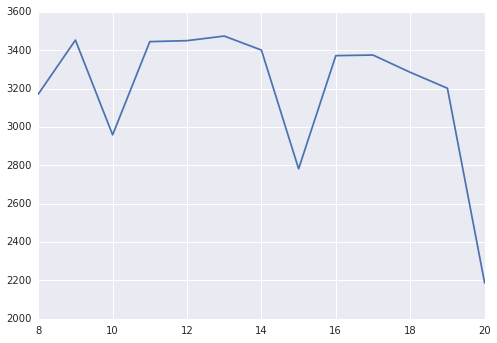

In [47]:
occupancy.plot()